In [67]:
# Data Manipulation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# stacking
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_score, recall_score, f1_score

# imbalance
from imblearn.over_sampling import SMOTE

In [68]:
df = pd.read_excel("C:\\Users\\Anthony\\Pictures\\ml\\supervised-learning\\cross-sell-recommendation\\data\\january.xlsx")
df.head()

,Customers,A/C,Date,P,S,B,200g,O.P.,800g,1500g,ST,600g,KATIKATI,MANDAZI,DOUGHNUTS,50-50 SLICED,MANDO FAMILY PACK,4 Square,Qty
0,YUSSUF HUSSEIN YARE - NEW NAROK DEPOT (2294),2294,2026-01-07,0,390,105,96,0,18,0,0,84,0,20,0,0,0,0,713
1,WOTE DEPOT (1817),1817,2026-01-01,0,4365,2010,672,525,0,0,0,273,0,10,0,30,20,0,7905
2,WOOLMART SUPERMARTKET - NAKURU EAST (1579),1579,2026-01-02,0,435,435,699,144,296,0,0,752,0,0,0,7,0,134,2902
3,WOOLMART SUPERMARTKET - NAKURU CENTRAL (1578),1578,2026-01-02,0,416,259,464,39,301,0,0,546,0,0,0,29,0,31,2085
4,WESTERN MART -NGARA (1293),1293,2026-01-01,0,246,220,453,10,88,0,0,250,0,48,46,15,0,0,1376


In [69]:
df.columns

Index(['Customers', 'A/C', 'Date', 'P', 'S', 'B', '200g', 'O.P.', '800g',
       '1500g', 'ST', '600g', 'KATIKATI', 'MANDAZI', 'DOUGHNUTS',
       '50-50 SLICED', 'MANDO FAMILY PACK', '4 Square', 'Qty'],
      dtype='object')

In [70]:
df.shape

(805, 19)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 805 entries, 0 to 804
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customers          805 non-null    object        
 1   A/C                805 non-null    int64         
 2   Date               805 non-null    datetime64[ns]
 3   P                  805 non-null    int64         
 4   S                  805 non-null    int64         
 5   B                  805 non-null    int64         
 6   200g               805 non-null    int64         
 7   O.P.               805 non-null    int64         
 8   800g               805 non-null    int64         
 9   1500g              805 non-null    int64         
 10  ST                 805 non-null    int64         
 11  600g               805 non-null    int64         
 12  KATIKATI           805 non-null    int64         
 13  MANDAZI            805 non-null    int64         
 14  DOUGHNUTS 

In [72]:
# isna
df.isna().sum()

Customers            0
A/C                  0
Date                 0
P                    0
S                    0
B                    0
200g                 0
O.P.                 0
800g                 0
1500g                0
ST                   0
600g                 0
KATIKATI             0
MANDAZI              0
DOUGHNUTS            0
50-50 SLICED         0
MANDO FAMILY PACK    0
4 Square             0
Qty                  0
dtype: int64

In [73]:
# isempty
df.isnull().sum()

Customers            0
A/C                  0
Date                 0
P                    0
S                    0
B                    0
200g                 0
O.P.                 0
800g                 0
1500g                0
ST                   0
600g                 0
KATIKATI             0
MANDAZI              0
DOUGHNUTS            0
50-50 SLICED         0
MANDO FAMILY PACK    0
4 Square             0
Qty                  0
dtype: int64

In [74]:
df.columns

Index(['Customers', 'A/C', 'Date', 'P', 'S', 'B', '200g', 'O.P.', '800g',
       '1500g', 'ST', '600g', 'KATIKATI', 'MANDAZI', 'DOUGHNUTS',
       '50-50 SLICED', 'MANDO FAMILY PACK', '4 Square', 'Qty'],
      dtype='object')

In [75]:
df.drop(columns=['1500g','ST', 'KATIKATI'], inplace=True)

In [76]:
# statistics
df.describe()

,A/C,Date,P,S,B,200g,O.P.,800g,600g,MANDAZI,DOUGHNUTS,50-50 SLICED,MANDO FAMILY PACK,4 Square,Qty
count,805.000000,805,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000,805.000000
mean,2141.855901,2026-01-01 13:23:10.807453440,126.320497,3381.437267,1350.181366,3716.443478,323.186335,224.567702,924.808696,50.237267,15.708075,20.939130,6.237267,242.863354,10382.930435
min,55.000000,2026-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,1300.000000,2026-01-01 00:00:00,0.000000,411.000000,255.000000,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1794.000000
50%,1793.000000,2026-01-01 00:00:00,0.000000,1020.000000,510.000000,432.000000,95.000000,145.000000,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3987.000000
75%,2195.000000,2026-01-01 00:00:00,0.000000,3990.000000,1590.000000,4272.000000,285.000000,300.000000,1226.000000,48.000000,2.000000,1.000000,0.000000,120.000000,12648.000000
max,7098.000000,2026-01-29 00:00:00,15150.000000,41880.000000,16965.000000,73992.000000,9105.000000,6018.000000,9166.000000,9536.000000,538.000000,1243.000000,356.000000,20415.000000,130004.000000
std,1554.885038,NaN,740.855366,5545.694063,2092.014681,7931.431042,766.005565,370.094037,1135.156745,347.509973,44.782593,62.640251,25.883341,1097.892862,15991.097539


# this products has a mean below 50
* mandazi
* dougnuts
* 50/50
* family pack

In [77]:
# checking for imbalance
for column in df.columns:
    print(f"{column} value counts:")
    print(df[column].value_counts())
    print("\n")


Customers value counts:
Customers
MARTIN MUTEMBEI KINYUA - (2273)- REVELATION DEPOT, NAKURU    2
MAKUYU NEW                                                   2
WOOLMART SUPERMARTKET -  NAKURU EAST (1579)                  1
WOOLMART SUPERMARTKET -  NAKURU CENTRAL (1578)               1
WESTERN MART -NGARA (1293)                                   1
                                                            ..
AKIMA SPRINGS JUNIOR ACADEMY                                 1
AGNES-KUNGU MAITU - NYERI (1511)                             1
ADERA                                                        1
ACK ST LUKE'S FEEDING PROGRAMME - THIKA (5165)               1
 LUNGA LUNGA DEPOT  -SAMUEL CHEGE MINAI (1838)               1
Name: count, Length: 803, dtype: int64


A/C value counts:
A/C
2294    1
1817    1
1579    1
1578    1
1293    1
       ..
5139    1
1511    1
6351    1
5165    1
1838    1
Name: count, Length: 805, dtype: int64


Date value counts:
Date
2026-01-01    627
2026-01-02    130

In [78]:
# percentage distribution
for column in df.columns:
    print(f"{column} percentage distribution:")
    print(df[column].value_counts(normalize=True) * 100)
    print("\n")

Customers percentage distribution:
Customers
MARTIN MUTEMBEI KINYUA - (2273)- REVELATION DEPOT, NAKURU    0.248447
MAKUYU NEW                                                   0.248447
WOOLMART SUPERMARTKET -  NAKURU EAST (1579)                  0.124224
WOOLMART SUPERMARTKET -  NAKURU CENTRAL (1578)               0.124224
WESTERN MART -NGARA (1293)                                   0.124224
                                                               ...   
AKIMA SPRINGS JUNIOR ACADEMY                                 0.124224
AGNES-KUNGU MAITU - NYERI (1511)                             0.124224
ADERA                                                        0.124224
ACK ST LUKE'S FEEDING PROGRAMME - THIKA (5165)               0.124224
 LUNGA LUNGA DEPOT  -SAMUEL CHEGE MINAI (1838)               0.124224
Name: proportion, Length: 803, dtype: float64


A/C percentage distribution:
A/C
2294    0.124224
1817    0.124224
1579    0.124224
1578    0.124224
1293    0.124224
          ...   
51

<Axes: xlabel='Date'>

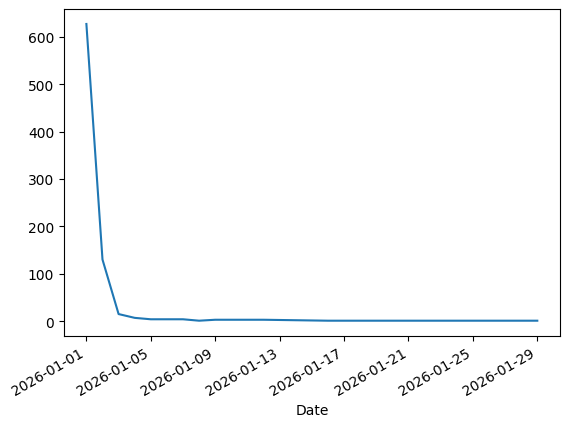

In [79]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].value_counts().sort_index().plot()

In [80]:
df.columns

Index(['Customers', 'A/C', 'Date', 'P', 'S', 'B', '200g', 'O.P.', '800g',
       '600g', 'MANDAZI', 'DOUGHNUTS', '50-50 SLICED', 'MANDO FAMILY PACK',
       '4 Square', 'Qty'],
      dtype='object')

200g                 3716.443478
S                    3381.437267
B                    1350.181366
600g                  924.808696
4 Square              242.863354
800g                  224.567702
P                     126.320497
MANDAZI                50.237267
50-50 SLICED           20.939130
DOUGHNUTS              15.708075
MANDO FAMILY PACK       6.237267
dtype: float64

Dominance ratio:
 200g                 595.844852
S                    542.134435
B                    216.470026
600g                 148.271460
4 Square              38.937463
800g                  36.004182
P                     20.252539
MANDAZI                8.054372
50-50 SLICED           3.357100
DOUGHNUTS              2.518423
MANDO FAMILY PACK      1.000000
dtype: float64


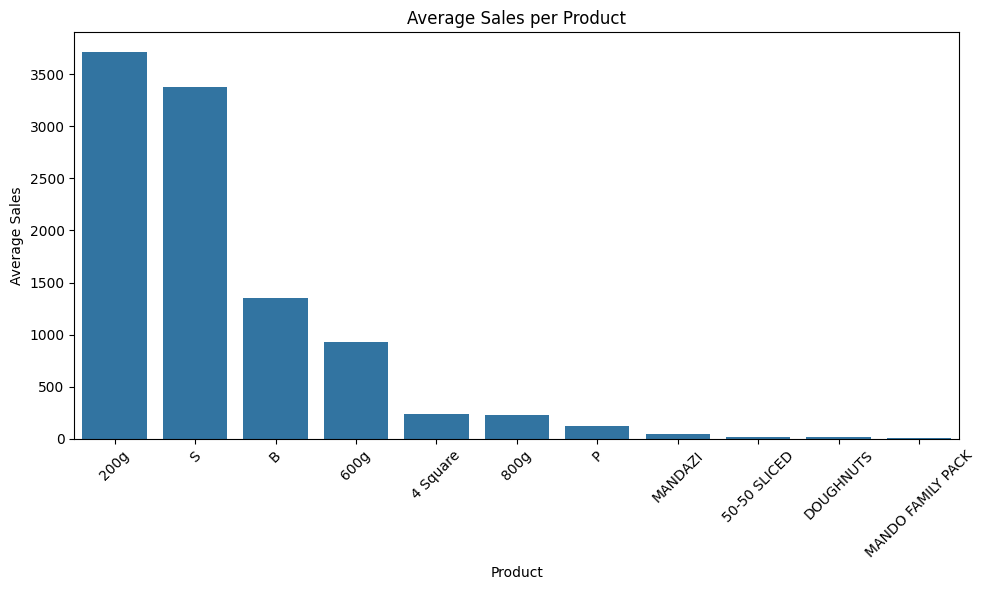

In [81]:
product_cols = [
    'P', 'S', 'B',
    '200g','800g','600g','MANDAZI',
    'DOUGHNUTS','50-50 SLICED','MANDO FAMILY PACK','4 Square'
]

means = df[product_cols].mean().sort_values(ascending=False)
ratio = means / means.min()

print(means)
print("\nDominance ratio:\n", ratio)
plt.figure(figsize=(10, 6))
sns.barplot(x=means.index, y=means.values)
plt.title('Average Sales per Product')
plt.xlabel('Product')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# since the dataset is imbalance based on the different orders for different customers

In [82]:
df.columns

Index(['Customers', 'A/C', 'Date', 'P', 'S', 'B', '200g', 'O.P.', '800g',
       '600g', 'MANDAZI', 'DOUGHNUTS', '50-50 SLICED', 'MANDO FAMILY PACK',
       '4 Square', 'Qty'],
      dtype='object')

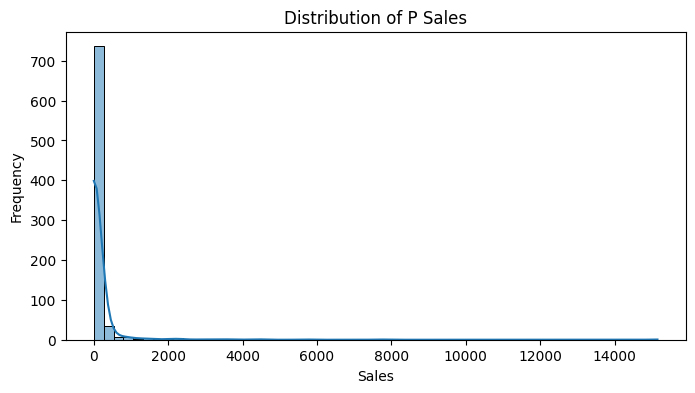

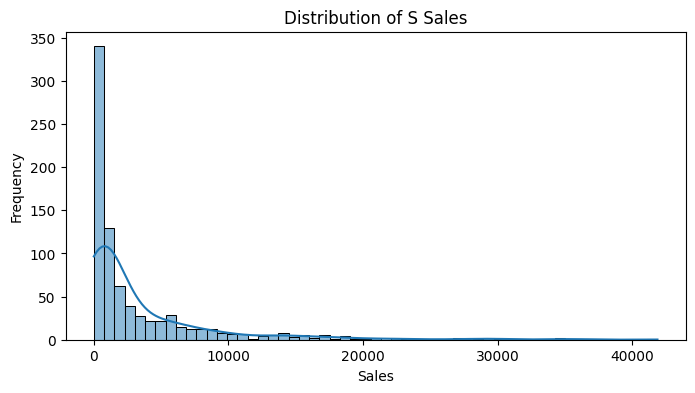

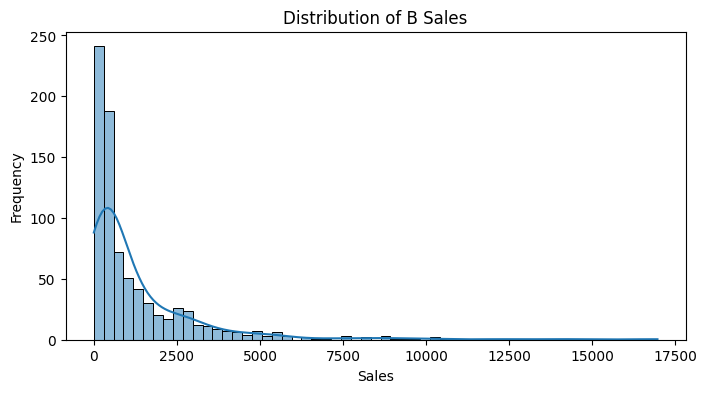

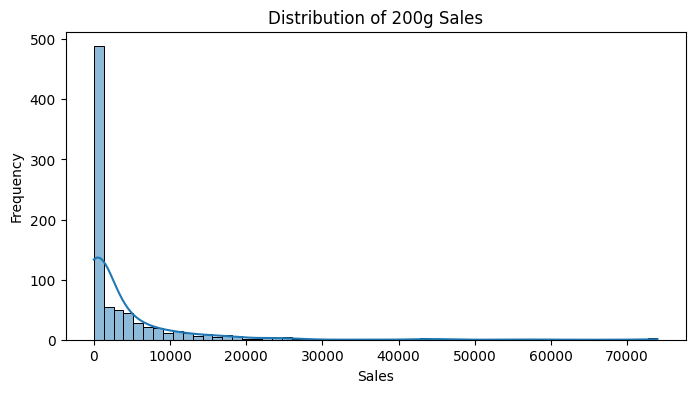

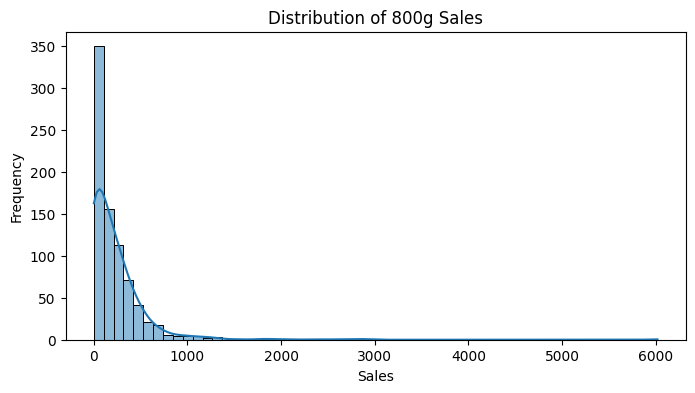

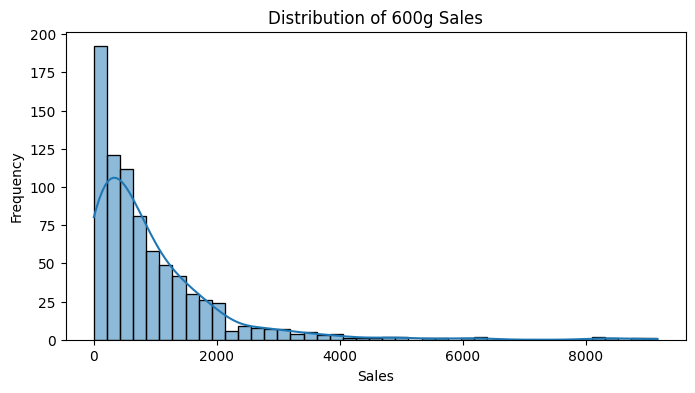

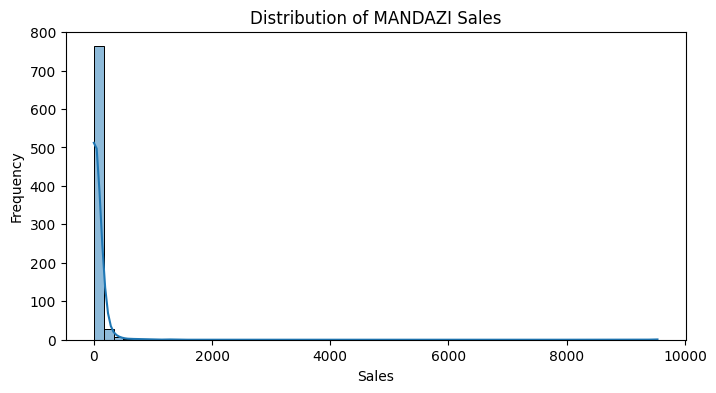

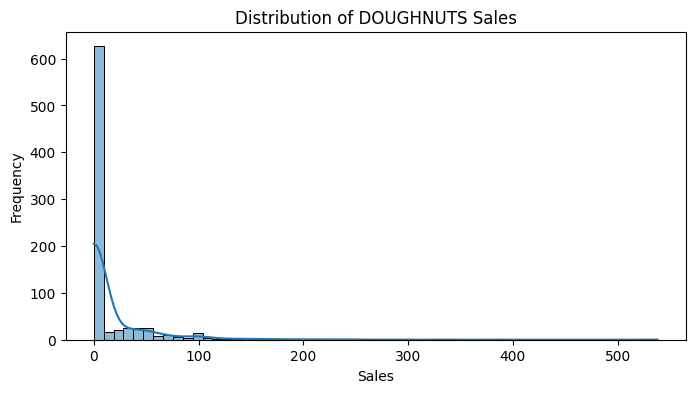

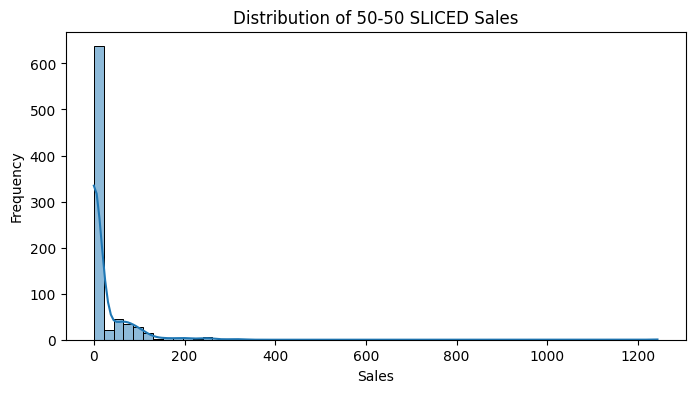

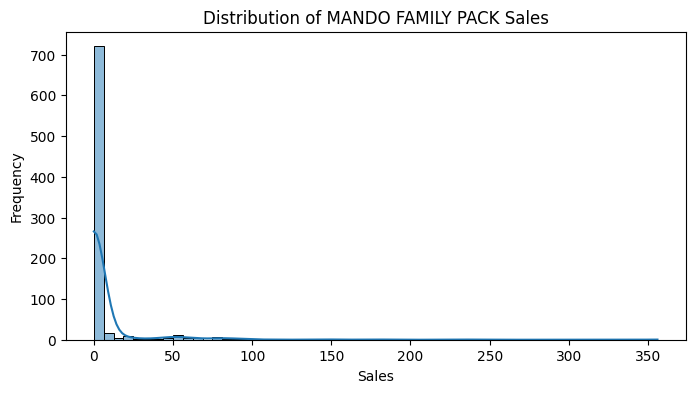

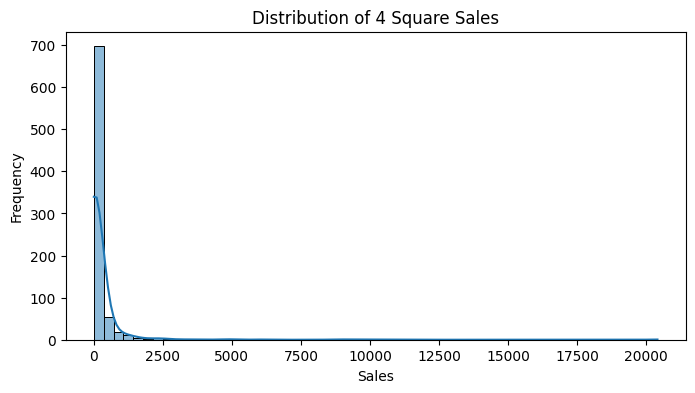

In [83]:
# data distribution
for column in product_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column} Sales')
    plt.xlabel('Sales')
    plt.ylabel('Frequency')
    plt.show()

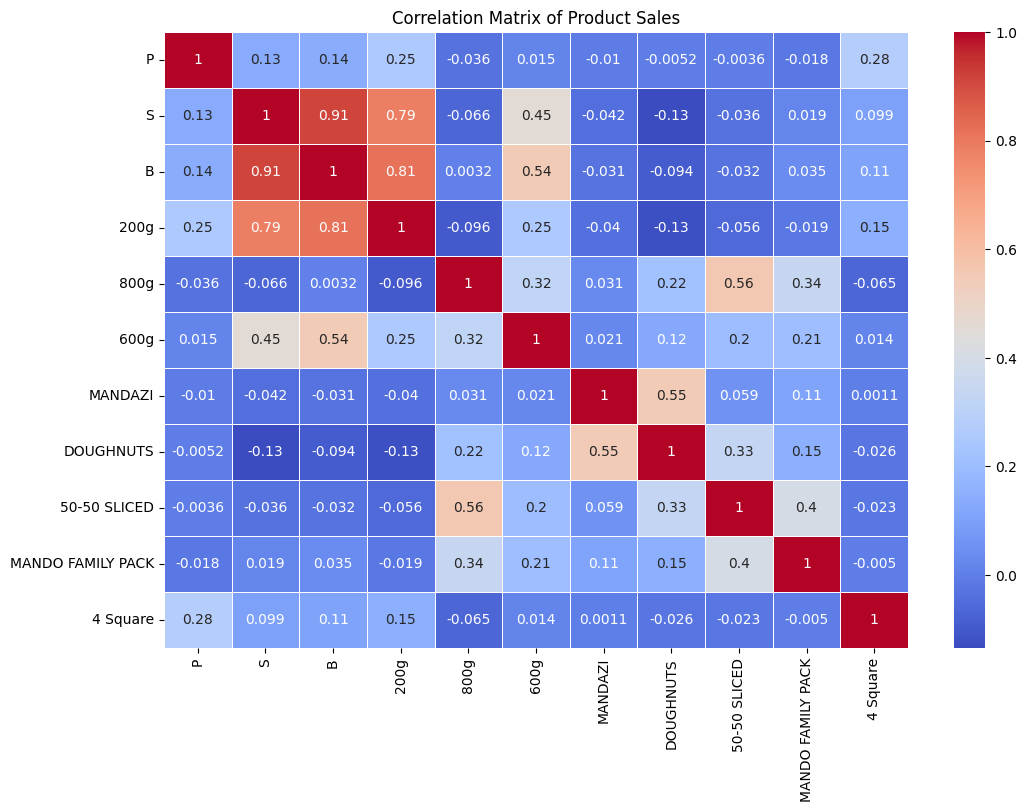

In [84]:
# correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df[product_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Product Sales')
plt.show()

In [85]:
# convert text to numeric and save original names
from sklearn.preprocessing import LabelEncoder

# Save original customer names before encoding
original_customers = df['Customers'].copy()
le = LabelEncoder()
df['Customers'] = le.fit_transform(df['Customers'])

# Create mapping from encoded to original names
customer_mapping = dict(zip(le.transform(original_customers), original_customers))


In [86]:
# # train one model for each product - USING REGRESSION (predicting quantity)
# from sklearn.ensemble import GradientBoostingRegressor
# import warnings
# warnings.filterwarnings('ignore')

# products = [
#     '200g','S','B','600g','4 Square','800g','P',
#     'MANDAZI','50-50 SLICED','DOUGHNUTS','MANDO FAMILY PACK'
# ]

# mdl = {}
# models = {
#     "Linear Regression": LinearRegression(),
#     "Decision Tree": DecisionTreeRegressor(),
#     "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
#     "Gradient Boosting": GradientBoostingRegressor(random_state=42),
#     "XGBoost": XGBRegressor(eval_metric='rmse', random_state=42),
#     "LightGBM": LGBMRegressor(random_state=42),
#     "CatBoost": CatBoostRegressor(verbose=0, random_state=42)
# }

# for product in products:
#     # Remove the target product from features
#     feature_cols = [col for col in products if col != product]
#     X = df[['Customers'] + feature_cols]
#     y = df[product]

#     # split the data
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#     mdl[product] = {}

#     # feature scaling
#     scaler = StandardScaler()
#     X_train_scaled = scaler.fit_transform(X_train)
#     X_test_scaled = scaler.transform(X_test)

#     for name, model in models.items():
#         model.fit(X_train_scaled, y_train)
#         y_pred = model.predict(X_test_scaled)
        
#         # Use regression metrics
#         rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#         mae = mean_absolute_error(y_test, y_pred)
#         r2 = r2_score(y_test, y_pred)
        
#         mdl[product][name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}

# # print results
# for product, model_metrics in mdl.items():
#     print(f"Product: {product}")
#     for model_name, metrics in model_metrics.items():
#         print(f"  {model_name}: RMSE={metrics['RMSE']:.4f}, MAE={metrics['MAE']:.4f}, R2={metrics['R2']:.4f}")
#     print("\n")


In [87]:
# train one model for each product - USING REGRESSION (predicting quantity)
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
from sklearn.base import clone
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_error, precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')
scalers = {}

products = [
    '200g','S','B','600g','4 Square','800g','P',
    'MANDAZI','50-50 SLICED','DOUGHNUTS','MANDO FAMILY PACK'
]

mdl = {}
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(eval_metric='rmse', random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42)
}

for product in products:

    feature_cols = [col for col in products if col != product]
    X = df[['Customers'] + feature_cols]
    y = df[product]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    mdl[product] = {}
    
    # Scale only for linear regression
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    scalers[product] = scaler

    for name, model in models.items():
        
        model_copy = clone(model)

        if name == "Linear Regression":
            model_copy.fit(X_train_scaled, y_train)
            y_pred = model_copy.predict(X_test_scaled)
        else:
            model_copy.fit(X_train, y_train)
            y_pred = model_copy.predict(X_test)

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        mdl[product][name] = {
            'Model': model_copy,
            'RMSE': rmse,
            'MAE': mae,
            'R2': r2
        }


# print results
for product, model_metrics in mdl.items():
    print(f"Product: {product}")
    for model_name, metrics in model_metrics.items():
        print(f"  {model_name}: RMSE={metrics['RMSE']:.4f}, MAE={metrics['MAE']:.4f}, R2={metrics['R2']:.4f}")
    print("\n")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1276
[LightGBM] [Info] Number of data points in the train set: 644, number of used features: 11
[LightGBM] [Info] Start training from score 3640.009317
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

In [88]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import numpy as np

for product in products:

    feature_cols = [col for col in products if col != product]
    X = df[['Customers'] + feature_cols]
    y = df[product]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # base models (REGRESSORS ONLY)
    # Note: CatBoost removed from stacking due to sklearn compatibility issues
    estimators = [
        ('lr', LinearRegression()),
        ('dt', DecisionTreeRegressor()),
        ('rf', RandomForestRegressor(n_estimators=200, random_state=42)),
        ('xgb', XGBRegressor(eval_metric='rmse', random_state=42)),
        # ('lgb', LGBMRegressor(random_state=42))
    ]

    stack = StackingRegressor(
        estimators=estimators,
        final_estimator=GradientBoostingRegressor(),
        passthrough=True
    )

    # feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    stack.fit(X_train_scaled, y_train)
    y_pred = stack.predict(X_test_scaled)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Stacking Regressor for {product}: RMSE={rmse:.4f}, MAE={mae:.4f}, R2={r2:.4f}")


Stacking Regressor for 200g: RMSE=6817.0094, MAE=2578.3148, R2=0.3643
Stacking Regressor for S: RMSE=3287.8305, MAE=1416.0573, R2=0.7543
Stacking Regressor for B: RMSE=860.9585, MAE=453.7336, R2=0.8838
Stacking Regressor for 600g: RMSE=1020.1968, MAE=581.0764, R2=0.0779
Stacking Regressor for 4 Square: RMSE=1084.3698, MAE=399.3839, R2=-7.9401
Stacking Regressor for 800g: RMSE=310.7690, MAE=161.5078, R2=0.0844
Stacking Regressor for P: RMSE=586.4759, MAE=192.1802, R2=-0.3215
Stacking Regressor for MANDAZI: RMSE=51.4310, MAE=30.6155, R2=0.6177
Stacking Regressor for 50-50 SLICED: RMSE=37.2594, MAE=17.6855, R2=0.4107
Stacking Regressor for DOUGHNUTS: RMSE=29.4241, MAE=9.7761, R2=0.6215
Stacking Regressor for MANDO FAMILY PACK: RMSE=19.7862, MAE=7.4379, R2=-0.1158


In [89]:
best_models = {}
best_model_info = {}  # Store model name and metrics

for product in mdl:
    
    best_model_name = min(
        mdl[product],
        key=lambda x: mdl[product][x]['RMSE']
    )
    
    best_models[product] = mdl[product][best_model_name]['Model']
    best_model_info[product] = {
        'Model': best_model_name,
        'RMSE': mdl[product][best_model_name]['RMSE'],
        'R2': mdl[product][best_model_name]['R2'],
        'MAE': mdl[product][best_model_name]['MAE']
    }
    
print("Best model selected for each product.")


Best model selected for each product.


In [90]:
def recommend_products(customer_row, customer_name=None, top_n=3):

    recommendations = {}

    for product, model in best_models.items():

        X_input = customer_row[['Customers'] + [p for p in products if p != product]]

        # Use predict() instead of predict_proba() for regression models
        pred = model.predict(X_input)[0]
        recommendations[product] = {
            'Predicted_Quantity': max(0, pred),
            'Model': best_model_info[product]['Model'],
            'RMSE': best_model_info[product]['RMSE'],
            'R2': best_model_info[product]['R2'],
            'MAE': best_model_info[product]['MAE']
        }

    rec_df = pd.DataFrame.from_dict(recommendations, orient='index')
    rec_df.reset_index(inplace=True)
    rec_df.rename(columns={'index': 'Product'}, inplace=True)

    # Remove already purchased (quantity > 0)
    bought = [p for p in products if customer_row[p].values[0] > 0]

    rec_df = rec_df[~rec_df['Product'].isin(bought)]

    rec_df = rec_df.sort_values(by='Predicted_Quantity', ascending=False)

    # Display customer name if provided
    if customer_name:
        print(f"\n{'='*100}")
        print(f"Cross-Sell Recommendations for: {customer_name}")
        print(f"{'='*100}\n")

    return rec_df.head(top_n)


In [96]:
# retrieve customer name from the mapping and get recommendations
customer_example = df.iloc[[3]]
customer_encoded = df.iloc[3]['Customers']
customer_name = customer_mapping.get(customer_encoded, f"Customer {customer_encoded}")

recommendations = recommend_products(customer_example, customer_name=customer_name, top_n=3)
print(recommendations.to_string(index=False))

# Display detailed metrics for each recommendation
print(f"\n{'='*100}")
print("Detailed Model Performance Metrics:")
print(f"{'='*100}\n")
for idx, row in recommendations.iterrows():
    print(f"Product: {row['Product']}")
    print(f"  Algorithm: {row['Model']}")
    print(f"  Predicted Quantity: {row['Predicted_Quantity']:.2f} units")
    print(f"  Model R² Score: {row['R2']:.4f} (Goodness of fit)")
    print(f"  Model RMSE: {row['RMSE']:.4f} (Prediction error)")
    print(f"  Model MAE: {row['MAE']:.4f} (Avg absolute error)")
    print()



Cross-Sell Recommendations for: WOOLMART SUPERMARTKET -  NAKURU CENTRAL (1578)

          Product  Predicted_Quantity             Model       RMSE       R2        MAE
                P       140836.282844 Linear Regression 488.581274 0.082842 188.456170
MANDO FAMILY PACK            1.389572 Gradient Boosting  18.058464 0.070514   7.677948
          MANDAZI            1.312232           XGBoost  45.427763 0.701727  29.333826

Detailed Model Performance Metrics:

Product: P
  Algorithm: Linear Regression
  Predicted Quantity: 140836.28 units
  Model R² Score: 0.0828 (Goodness of fit)
  Model RMSE: 488.5813 (Prediction error)
  Model MAE: 188.4562 (Avg absolute error)

Product: MANDO FAMILY PACK
  Algorithm: Gradient Boosting
  Predicted Quantity: 1.39 units
  Model R² Score: 0.0705 (Goodness of fit)
  Model RMSE: 18.0585 (Prediction error)
  Model MAE: 7.6779 (Avg absolute error)

Product: MANDAZI
  Algorithm: XGBoost
  Predicted Quantity: 1.31 units
  Model R² Score: 0.7017 (Goodness o

In [92]:
new_customer = df.iloc[[0]].copy()

In [93]:
predictions = {}

for product in products:
    
    feature_cols = [col for col in products if col != product]
    X_new = new_customer[['Customers'] + feature_cols]
    
    model = best_models[product]
    
    if isinstance(model, LinearRegression):
        scaler = scalers[product]
        X_new_scaled = scaler.transform(X_new)
        pred = model.predict(X_new_scaled)[0]
    else:
        pred = model.predict(X_new)[0]
    
    predictions[product] = max(0, pred)  # remove negative predictions


In [94]:
already_bought = []

for product in products:
    if new_customer[product].values[0] > 0:
        already_bought.append(product)

recommend_df = pd.DataFrame(
    predictions.items(),
    columns=['Product','Predicted_Quantity']
)

recommend_df = recommend_df[
    ~recommend_df['Product'].isin(already_bought)
]


In [95]:
recommend_df = recommend_df.sort_values(
    by='Predicted_Quantity',
    ascending=False
)

top_recommendations = recommend_df.head(12)

print("Top Cross-Sell Recommendations:")
print(top_recommendations)


Top Cross-Sell Recommendations:
              Product  Predicted_Quantity
4            4 Square          165.633231
6                   P           68.839964
10  MANDO FAMILY PACK            6.606204
8        50-50 SLICED            5.050000
9           DOUGHNUTS            2.544758
